# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tsengel
Processing Record 5 of Set 1 | qui nhon
Processing Record 6 of Set 1 | kill devil hills
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | patong
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | el bayadh
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | callao
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | kendari
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | mermoz boabab
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,6.52,81,56,3.49,AU,1693514922
1,talnakh,69.4865,88.3972,1.23,71,54,0.86,RU,1693514923
2,bethel,41.3712,-73.4140,25.41,51,0,5.14,US,1693514649
3,tsengel,49.4783,100.8894,12.88,85,93,1.41,MN,1693514923
4,qui nhon,13.7667,109.2333,26.75,81,100,3.32,VN,1693514924


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,6.52,81,56,3.49,AU,1693514922
1,talnakh,69.4865,88.3972,1.23,71,54,0.86,RU,1693514923
2,bethel,41.3712,-73.4140,25.41,51,0,5.14,US,1693514649
3,tsengel,49.4783,100.8894,12.88,85,93,1.41,MN,1693514923
4,qui nhon,13.7667,109.2333,26.75,81,100,3.32,VN,1693514924


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

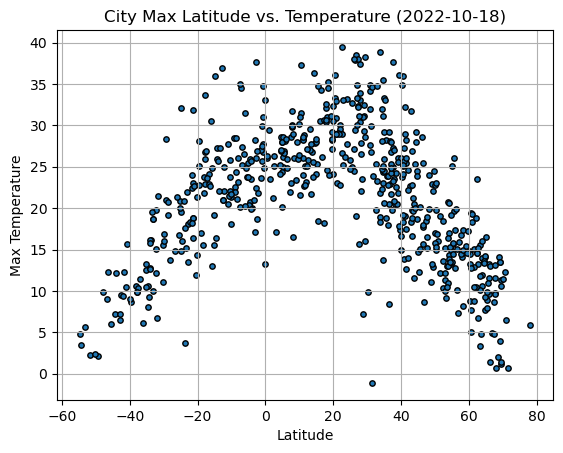

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], s= 15, edgecolors="black", alpha=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

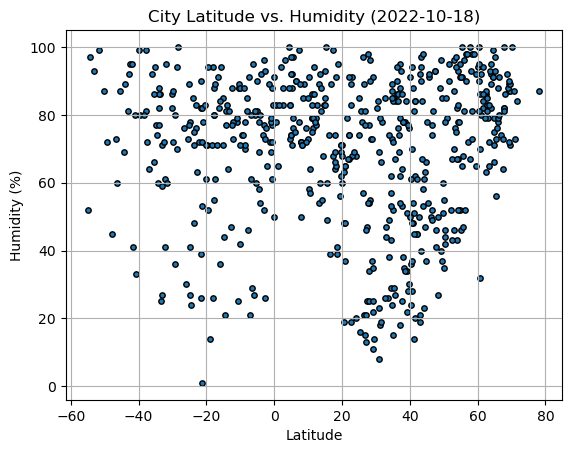

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], s= 15, edgecolors="black", alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

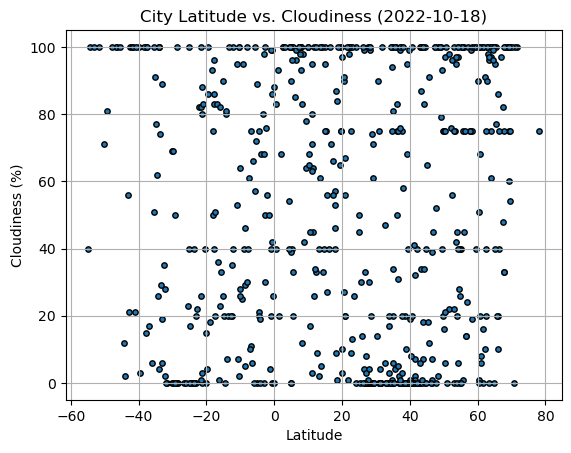

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], s= 15, edgecolors="black", alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

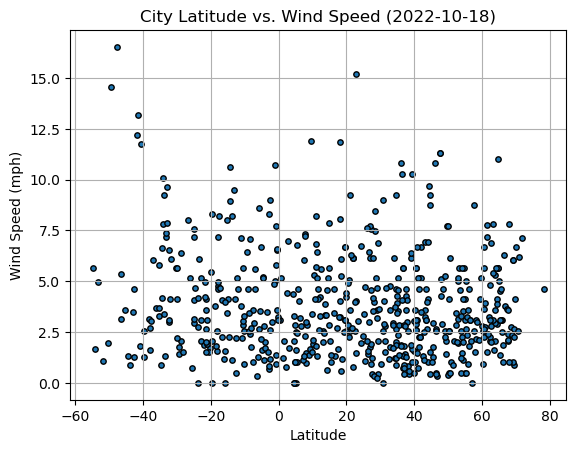

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s= 15, edgecolors="black", alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create equation of line to display on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, s= 15, edgecolors="black", alpha=1)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Show the plot
    plt.show()
    
    # Save the figure
    plt.savefig("output_data/{title}.png")

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,1.23,71,54,0.86,RU,1693514923
2,bethel,41.3712,-73.4140,25.41,51,0,5.14,US,1693514649
3,tsengel,49.4783,100.8894,12.88,85,93,1.41,MN,1693514923
4,qui nhon,13.7667,109.2333,26.75,81,100,3.32,VN,1693514924
5,kill devil hills,36.0307,-75.6760,23.88,84,100,10.80,US,1693514924


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,6.52,81,56,3.49,AU,1693514922
6,adamstown,-25.0660,-130.1015,20.84,89,100,7.56,PN,1693514924
10,carnarvon,-24.8667,113.6333,19.58,78,0,4.06,AU,1693514926
14,port-aux-francais,-49.3500,70.2167,2.09,72,81,14.58,TF,1693514927
17,callao,-12.0667,-77.1500,22.07,73,100,4.63,PE,1693514928


###  Temperature vs. Latitude Linear Regression Plot

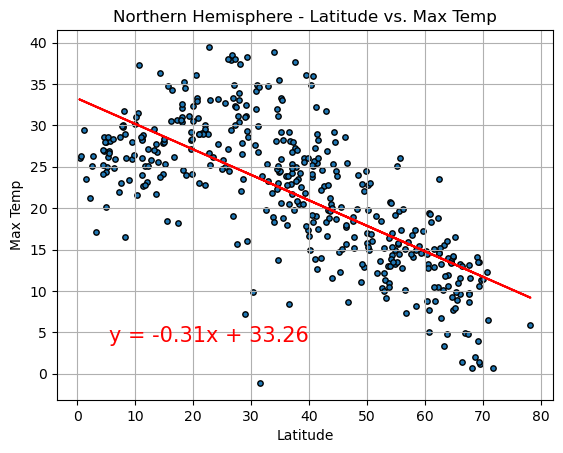

In [30]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create equation of line to display on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, s=15, edgecolors="black", alpha=1)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(f"output_data/{title}.png")

    # Show the plot
    plt.show()

# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values_north, y_values_north, "Northern Hemisphere - Latitude vs. Max Temp", "Latitude", "Max Temp")

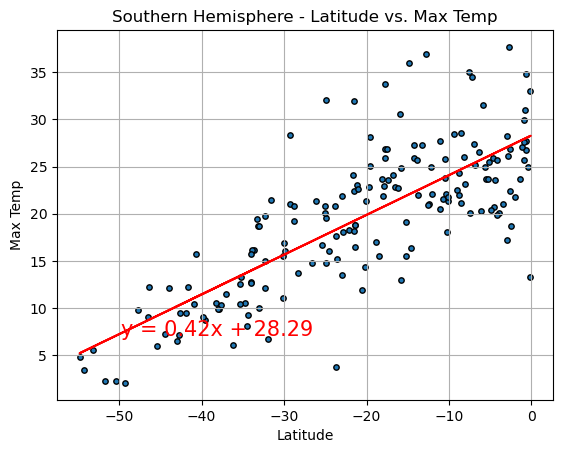

In [31]:
#Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values_south, y_values_south, "Southern Hemisphere - Latitude vs. Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** With this two plots, its noticeable that having 0 as the division in Northern and Southern Hemispheres, i dont know if we can say that the Ecuador is that division, but further from this division it represents a lower (colder) temperature, and viceversa, closests to the division the temperature is higher (warmer).

### Humidity vs. Latitude Linear Regression Plot

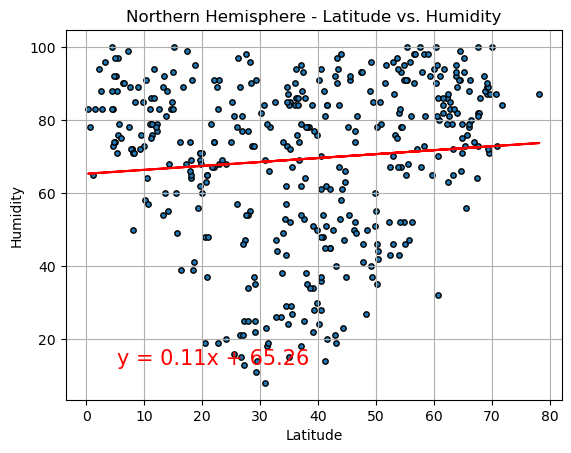

In [32]:
# Northern Hemisphere
x_values_north_humidity = northern_hemi_df["Lat"]
y_values_north_humidity = northern_hemi_df["Humidity"]

plot_linear_regression(x_values_north_humidity, y_values_north_humidity, "Northern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity")

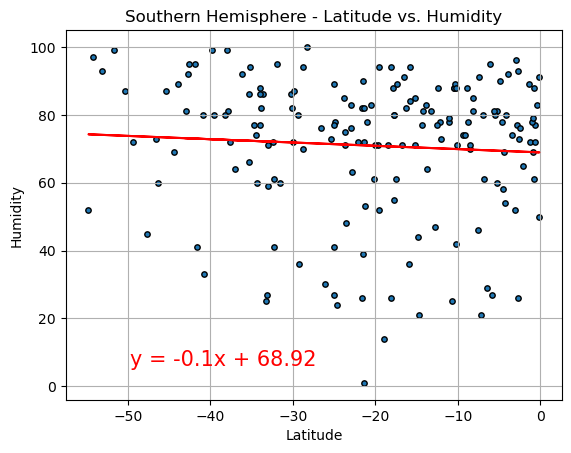

In [33]:
# Southern Hemisphere
x_values_south_humidity = southern_hemi_df["Lat"]
y_values_south_humidity = southern_hemi_df["Humidity"]

plot_linear_regression(x_values_south_humidity, y_values_south_humidity, "Southern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity")


**Discussion about the linear relationship:** In this data comparisson, we can say that the northern hemisphere has more humidity regarding where its the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

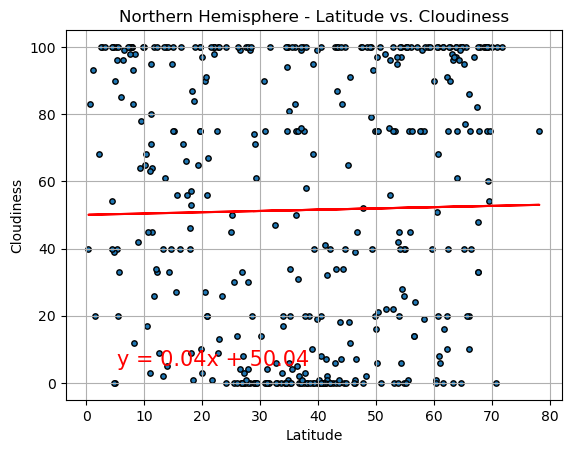

In [34]:
# Northern Hemisphere
x_values_north_cloudiness = northern_hemi_df["Lat"]
y_values_north_cloudiness = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values_north_cloudiness, y_values_north_cloudiness, "Northern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness")


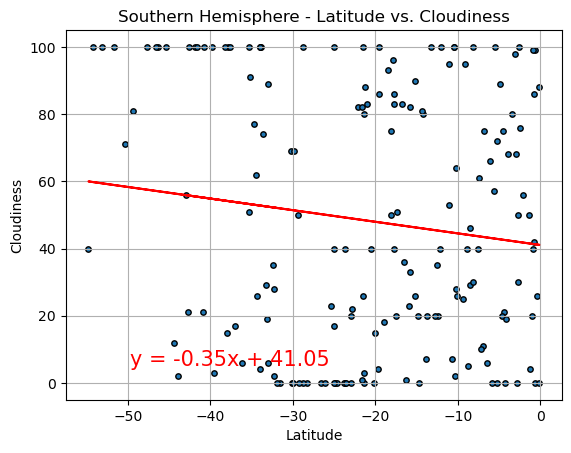

In [35]:
# Southern Hemisphere
x_values_south_cloudiness = southern_hemi_df["Lat"]
y_values_south_cloudiness = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values_south_cloudiness, y_values_south_cloudiness, "Southern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness")


**Discussion about the linear relationship:** Cloudiness data shows that further from the slope, it is where most of the clouds are in those geolocations indepentant from the latitude /hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

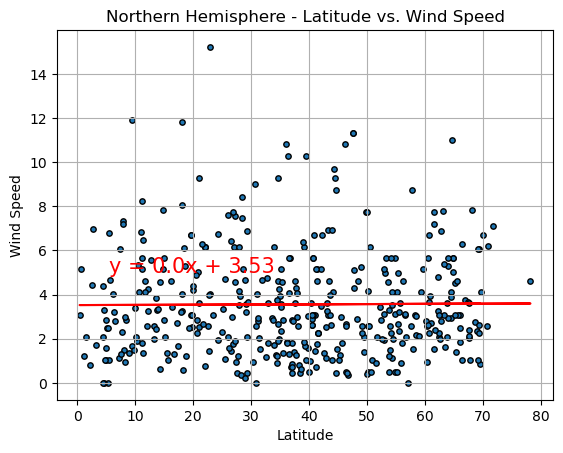

In [36]:
# Northern Hemisphere
x_values_north_wind = northern_hemi_df["Lat"]
y_values_north_wind = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values_north_wind, y_values_north_wind, "Northern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed")


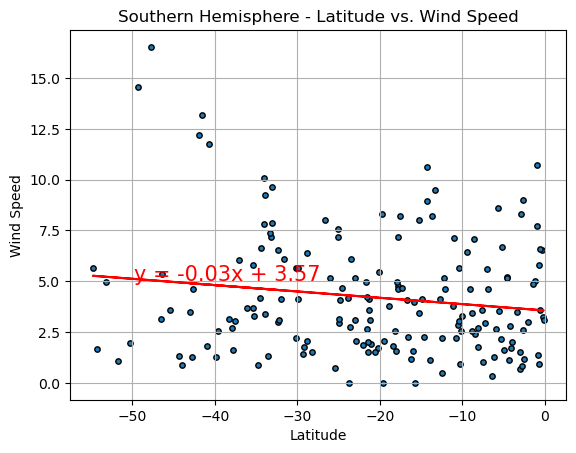

In [37]:
# Southern Hemisphere
x_values_south_wind = southern_hemi_df["Lat"]
y_values_south_wind = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values_south_wind, y_values_south_wind, "Southern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed")


**Discussion about the linear relationship:** Wind speed is greater when its further from the slope, not high wind speeds are near the division of the hemispheres.